# A tutorial for the lidar Python package

This notebook demonstrates the usage of the **lidar** Python package for terrain and hydrological analysis. It is  useful for analyzing high-resolution topographic data, such as digital elevation models (DEMs) derived from Light Detection and Ranging (LiDAR) data.

* GitHub repo: https://github.com/giswqs/lidar
* Documentation: https://lidar.readthedocs.io.
* PyPI: https://pypi.org/project/lidar/
* Binder: https://gishub.org/lidar-cloud
* Free software: [MIT license](https://opensource.org/licenses/MIT)

This tutorial can be accessed in three ways:

* HTML version: https://gishub.org/lidar-html
* Viewable Notebook: https://gishub.org/lidar-notebook
* Interactive Notebook: https://gishub.org/lidar-cloud

**Launch this tutorial as an interactive Jupyter Notebook on the cloud - [MyBinder.org](https://gishub.org/lidar-cloud).**

![lidar-gif](https://i.imgur.com/aIttPVG.gif)

## Table of Content

* [Installation](#Installation)
* [Getting data](#Getting-data)
* [Using lidar](#Using-lidar)
* [Displaying results](#Displaying-results)
* [lidar GUI](#lidar-GUI)
* [Citing lidar](#Citing-lidar)
* [Credits](#Credits)
* [Contact](#Contact)


## Installation


The **lidar** Python package supports a variety of platforms, including Microsoft Windows, macOS, and Linux operating systems. Note that you will need to have **Python 3.x** installed. Python 2.x is not supported. The **lidar** Python package can be installed using the following command:

`pip install lidar`

If you have installed **lidar** Python package before and want to upgrade to the latest version, you can use the following command:

`pip install lidar -U`

If you encounter any installation issues, please check [Dependencies](https://github.com/giswqs/lidar#dependencies) on the **lidar** GitHub page and [Report Bugs](https://github.com/giswqs/lidar/issues).

## Getting data

This section demonstrates two ways to get data into Binder so that you can test the **lidar** Python package on the cloud using your own data. 

* [Getting data from direct URLs](#Getting-data-from-direct-URLs) 
* [Getting data from Google Drive](#Getting-data-from-Google-Drive)

### Getting data from direct URLs

If you have data hosted on your own HTTP server or GitHub, you should be able to get direct URLs. With a direct URL, users can automatically download the data when the URL is clicked. For example http://wetlands.io/file/data/lidar-dem.zip

Import the following Python libraries and start getting data from direct URLs.

In [1]:
import os
import pygis

Create a folder named *data* and set it as the working directory.

In [2]:
work_dir = 'data/'
if not os.path.exists(work_dir):
    os.mkdir(work_dir)
# print("Working directory: {}".format(os.path.realpath(work_dir)))

Replace the following URL with your own direct URL hosting the data you would like to use.

In [3]:
url = "https://github.com/giswqs/lidar/raw/master/examples/lidar-dem.zip"

Download data the from the above URL and unzip the file if needed.

In [4]:
pygis.download_from_url(url, out_dir=work_dir)

Unzipping lidar-dem.zip ...
Unzipping done.
Data directory: data/lidar-dem


You have successfully downloaded data to Binder. Therefore, you can skip to [Using lidar](#Using-lidar) and start testing **lidar** with your own data. 

### Getting data from Google Drive

Alternatively, you can upload data to [Google Drive](https://www.google.com/drive/) and then [share files publicly from Google Drive](https://support.google.com/drive/answer/2494822?co=GENIE.Platform%3DDesktop&hl=en). Once the file is shared publicly, you should be able to get a shareable URL. For example, https://drive.google.com/file/d/1c6v-ep5-klb2J32Nuu1rSyqAc8kEtmdh.

**Replace the following URL with your own shareable URL from Google Drive.**

In [5]:
gfile_url = 'https://drive.google.com/file/d/1c6v-ep5-klb2J32Nuu1rSyqAc8kEtmdh'

**Download the shared file from Google Drive.**

In [6]:
pygis.download_from_gdrive(gfile_url, file_name='lidar-dem.zip', out_dir=work_dir)

Google Drive file id: 1c6v-ep5-klb2J32Nuu1rSyqAc8kEtmdh
Unzipping...Done.


You have successfully downloaded data from Google Drive to Binder. You can now continue to [Using lidar](#Using-lidar) and start testing **lidar** with your own data. 

## Using lidar

Here you can specify where your data are located. In this example, we will use [dem.tif](https://github.com/giswqs/lidar/blob/master/examples/lidar-dem/dem.tif), which has been downloaded to the *lidar-dem* folder.

**Import the lidar package.**

In [7]:
import lidar

**List data under the data folder.**

In [8]:
data_dir = './data/lidar-dem/'
print(os.listdir(data_dir))

['sink.tif', 'dsm.tif', 'dem.tif']


**Create a temporary folder to save results.**

In [9]:
out_dir = os.path.join(os.getcwd(), "temp")

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In this simple example, we smooth [dem.tif](https://github.com/giswqs/lidar/blob/master/examples/lidar-dem/dem.tif) using a median filter. Then we extract sinks (i.e., depressions) from the DEM. Finally, we delineate nested depression hierarchy using the [level-set algorithm](https://doi.org/10.1111/1752-1688.12689). 

**Set parameters for the level-set algorithm.**

In [10]:
min_size = 1000         # minimum number of pixels as a depression
min_depth = 0.3         # minimum depth as a depression
interval = 0.3          # slicing interval for the level-set method
bool_shp = False        # output shapefiles for each individual level

**Smooth the original DEM using a median filter.**

In [11]:
# extracting sinks based on user-defined minimum depression size
in_dem = os.path.join(data_dir, 'dem.tif')
out_dem = os.path.join(out_dir, "median.tif")
in_dem = lidar.MedianFilter(in_dem, kernel_size=3, out_file=out_dem)

Median filtering ...
Run time: 0.0175 seconds
Saving dem ...


**Extract DEM sinks using a depression-filling algorithm.**

In [12]:
sink = lidar.ExtractSinks(in_dem, min_size, out_dir)

Loading data ...
min = 379.70, max = 410.72, no_data = -3.402823e+38, cell_size = 1.0
Depression filling ...
Saving filled dem ...
Region grouping ...
Computing properties ...
Saving sink dem ...
Saving refined dem ...
Converting raster to vector ...
Total run time:			 0.0702 s



**Identify depression nested hierarchy using the level-set algorithm.**

In [13]:
dep_id, dep_level = lidar.DelineateDepressions(sink, min_size, min_depth, interval, out_dir, bool_shp)

Reading data ...
rows, cols: (400, 400)
Pixel resolution: 1.0
Read data time: 0.0051 seconds
Data preparation time: 0.0172 seconds
Total number of regions: 1
Processing Region # 1 ...
=========== Run time statistics =========== 
(rows, cols):			 (400, 400)
Pixel resolution:		 1.0 m
Number of regions:		 1
Data preparation time:		 0.0172 s
Identify level time:		 0.2257 s
Write image time:		 0.0041 s
Polygonize time:		 0.0087 s
Total run time:			 0.2629 s


**Print the list of output files.**

In [14]:
print('Results are saved in: {}'.format(out_dir))
print(os.listdir(out_dir))

Results are saved in: /media/hdd/Dropbox/git/python-geospatial/examples/temp
['regions.prj', 'depression_level.tif', 'regions.shx', 'depression_id.tif', 'depressions.shp', 'depressions_info.csv', 'dem_diff.tif', 'sink.tif', 'regions.shp', 'depressions.prj', 'regions.dbf', 'depressions.shx', 'depth.tif', 'regions_info.csv', 'depressions.dbf', 'dem_filled.tif', 'dem.tif', 'region.tif', 'median.tif']


## Displaying results

This section demonstrates how to display images on Jupyter Notebook. Three Python packages are used here, including [matplotlib](https://matplotlib.org/), [imageio](https://imageio.readthedocs.io/en/stable/installation.html), and [tifffile](https://pypi.org/project/tifffile/). These three packages can be installed using the following command:

`pip install matplotlib imageio tifffile`


**Import the libraries.**

In [15]:
# comment out the third line (%matplotlib inline) if you run the tutorial in other IDEs other than Jupyter Notebook
import matplotlib.pyplot as plt
import imageio
%matplotlib inline  

**Display one single image.**

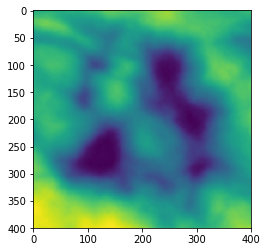

In [16]:
raster = imageio.imread(os.path.join(data_dir, 'dem.tif'))
plt.imshow(raster)
plt.show()

**Read images as numpy arrays.**

In [17]:
smoothed = imageio.imread(os.path.join(out_dir, 'median.tif'))
sink = imageio.imread(os.path.join(out_dir, 'sink.tif'))
dep_id = imageio.imread(os.path.join(out_dir, 'depression_id.tif'))
dep_level = imageio.imread(os.path.join(out_dir, 'depression_level.tif'))

**Display multiple images in one plot.**

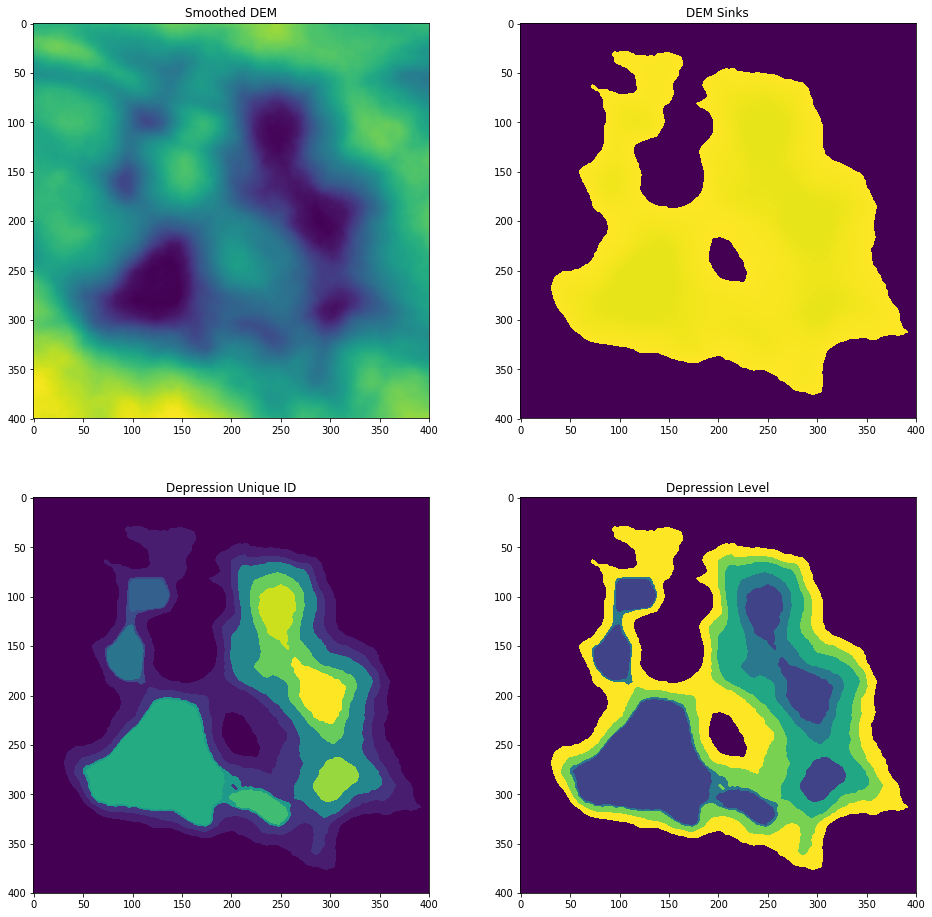

In [18]:
fig=plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Smoothed DEM')
plt.imshow(smoothed)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('DEM Sinks')
plt.imshow(sink)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Depression Unique ID')
plt.imshow(dep_id)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Depression Level')
plt.imshow(dep_level)

plt.show()

## lidar GUI

**lidar** also provides a Graphical User Interface (GUI), which can be invoked using the following Python script. *__Note that the GUI might not work in Jupyter notebooks deployed on the cloud (e.g., MyBinder.org), but it should work on Jupyter notebooks on local computers.__*

```python
import lidar
lidar.gui()

```

![lidar-gui](https://i.imgur.com/eSjcSs9.png)

## Citing lidar

If you use the **lidar** Python package for your research and publications, please consider citing the following papers on the contour tree and level-set algorithms, which are key components of this **lidar** Python package.

* Wu, Q., Lane, C.R., Wang, L., Vanderhoof, M.K., Christensen, J.R., & Liu, H. (2018). Efficient delineation of nested depression hierarchy in digital elevation models for hydrological analyses using level-set method. Journal of the American Water Resources Association. 1-15. https://doi.org/10.1111/1752-1688.12689

* Wu, Q., Liu, H., Wang, S., Yu, B., Beck, R., & Hinkel, K. (2015). A localized contour tree method for deriving geometric and topologic properties of complex surface depressions based on high resolution topographical data. International Journal of Geographical Information Science. 29:12, 2041-2060. http://dx.doi.org/10.1080/13658816.2015.1038719

## Credits

This interactive notebook is made possible by [MyBinder.org](https://mybinder.org/). Big thanks to [MyBinder.org](https://mybinder.org/) for developing the amazing binder platform, which is extremely valuable for reproducible research!

This tutorial made use a number of open-source Python packages, including [ Cookiecutter](https://github.com/audreyr/cookiecutter), [richdem](https://github.com/r-barnes/richdem), [numpy](http://www.numpy.org/), [scikit-image](https://scikit-image.org/) [matplotlib](https://matplotlib.org/), [imageio](https://imageio.readthedocs.io/en/stable/installation.html), [tifffile](https://pypi.org/project/tifffile/), [pygdal](https://pypi.org/project/pygdal/), [PySimpleGUI](https://pypi.org/project/PySimpleGUI/), and [google-drive-downloader](https://github.com/ndrplz/google-drive-downloader). Thanks to all developers of these wonderful Python packages!


## Contact

If you have any questions regarding this tutorial or the **lidar** Python package, you can contact me (Dr. Qiusheng Wu) at wqs@binghamton.edu or https://wetlands.io/#contact